In [413]:
import os
import numpy as np
from datetime import datetime
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')
import wandb
from wandb.keras import WandbCallback

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

from evtGAN import ChiScore, CrossEntropy, DCGAN, tf_utils, viz_utils, compile_dcgan

global rundir

plot_kwargs = {'bbox_inches': 'tight', 'dpi': 300}

# some static variables
paddings = tf.constant([[0,0], [1,1], [1,1], [0,0]])
var = 'wind'
conditions = "all"
im_size = (19, 23)
cwd = os.getcwd()
wd = os.path.join(cwd, "..")
indir = "/Users/alison/Documents/DPhil/multivariate/processed_wind_data"
imdir = os.path.join(wd, 'figures', 'temp')

In [418]:
reload(tf_utils)
train_size = 200
# load data
train_images, test_images = tf_utils.load_test_images(indir, train_size, conditions=conditions)
train_images = train_images.numpy()
test_images = test_images.numpy()

params_u10 = np.load(os.path.join(indir, f"train_{train_size}", "gev_params_u10_train.npy"))
params_v10 = np.load(os.path.join(indir, f"train_{train_size}", "gev_params_v10_train.npy"))

params_u10_test = np.load(os.path.join(indir, f"train_{train_size}", "gev_params_u10_test.npy"))
params_v10_test = np.load(os.path.join(indir, f"train_{train_size}", "gev_params_v10_test.npy"))

train_marginals = tf_utils.winds_to_marginals(train_images, (params_u10, params_v10))
test_marginals = tf_utils.winds_to_marginals(test_images, (params_u10_test, params_v10_test))

train_quantiles = tf_utils.marginals_to_winds(train_marginals, (params_u10, params_v10))

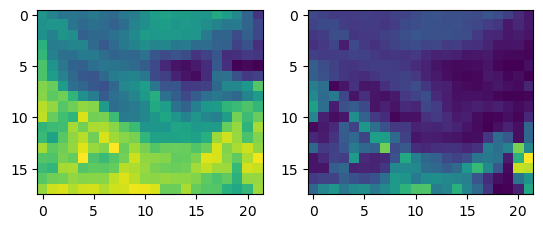

In [419]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(test_images[0, ..., 0])
axs[1].imshow(test_marginals[0, ..., 0])

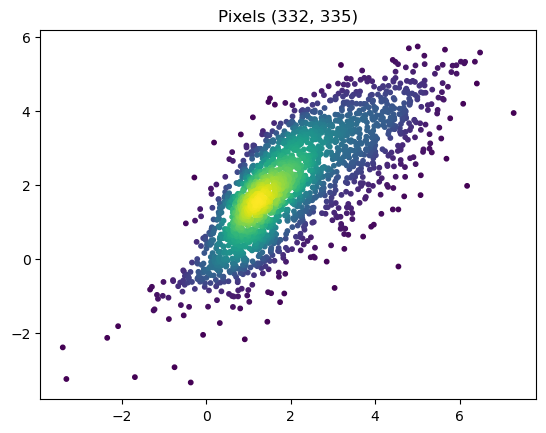

In [465]:
# : 
corrs = {'low': (351, 340), 'medium': (332, 335), 'high': (75, 119)}

reload(viz_utils)
fig, ax = plt.subplots()
viz_utils.plot_sample_density(test_images[..., 0], ax=ax, sample_pixels=corrs['medium'])

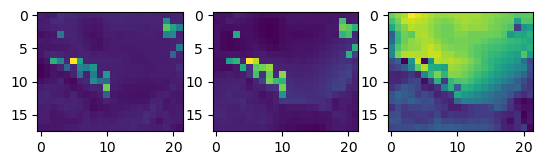

In [473]:
fig, ax = plt.subplots(1, 3)

loc = np.array([x[0] for x in params_u10]).reshape(18, 22)
scale = np.array([x[1] for x in params_u10]).reshape(18, 22)
size = np.array([x[2] for x in params_u10]).reshape(18, 22)

ax[0].imshow(loc)
ax[1].imshow(scale)
ax[2].imshow(size)

In [507]:
import geopandas as gpd



In [536]:
len(coords.drop_duplicates(['geometry']))

325

In [539]:
params_u10

array([[0.29963373, 0.85882882, 4.59965444],
       [0.20057422, 0.78645319, 4.91048411],
       [0.25736558, 0.91580843, 5.11285521],
       ...,
       [0.34523932, 1.11809142, 1.0738712 ],
       [0.17280428, 0.93548334, 1.39716096],
       [0.05201452, 0.86002792, 0.55762574]])

In [537]:
18 * 20

360

<Axes: >

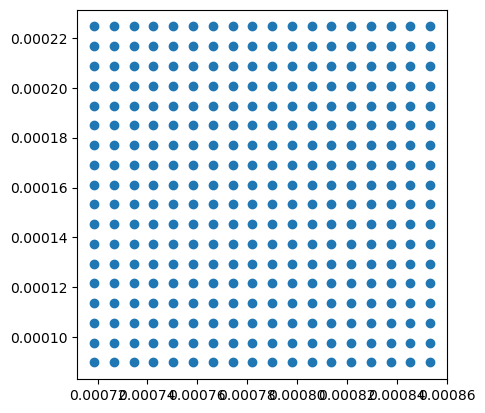

In [509]:
coords.plot()

<Axes: >

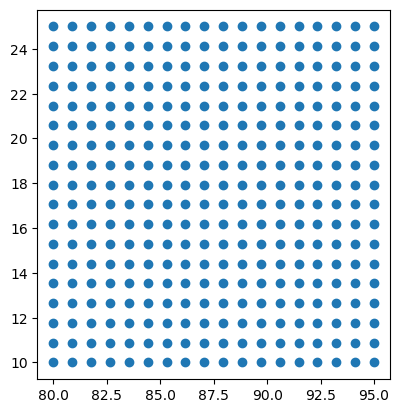

In [506]:
coords.plot()

In [510]:
wandb.init()
gan = DCGAN(wandb.config)
gan.generator.load_weights("/Users/alison/Documents/DPhil/multivariate/cycloneGAN/saved-models/distinctive-glade-39/generator_weights")

In [513]:
fake_marginals = gan(100)
fake_quantiles = tf_utils.marginals_to_winds(fake_marginals, (params_u10, params_v10))

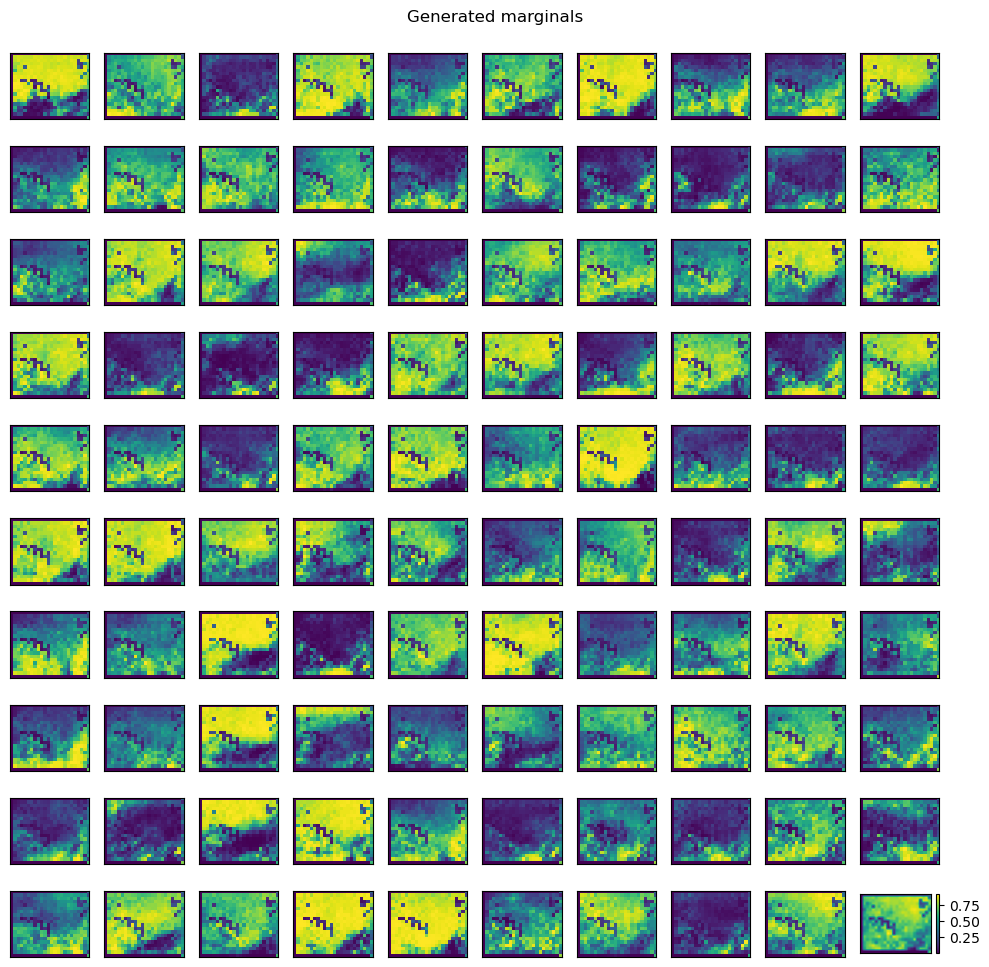

In [516]:
fig = viz_utils.plot_one_hundred_images(fake_marginals)

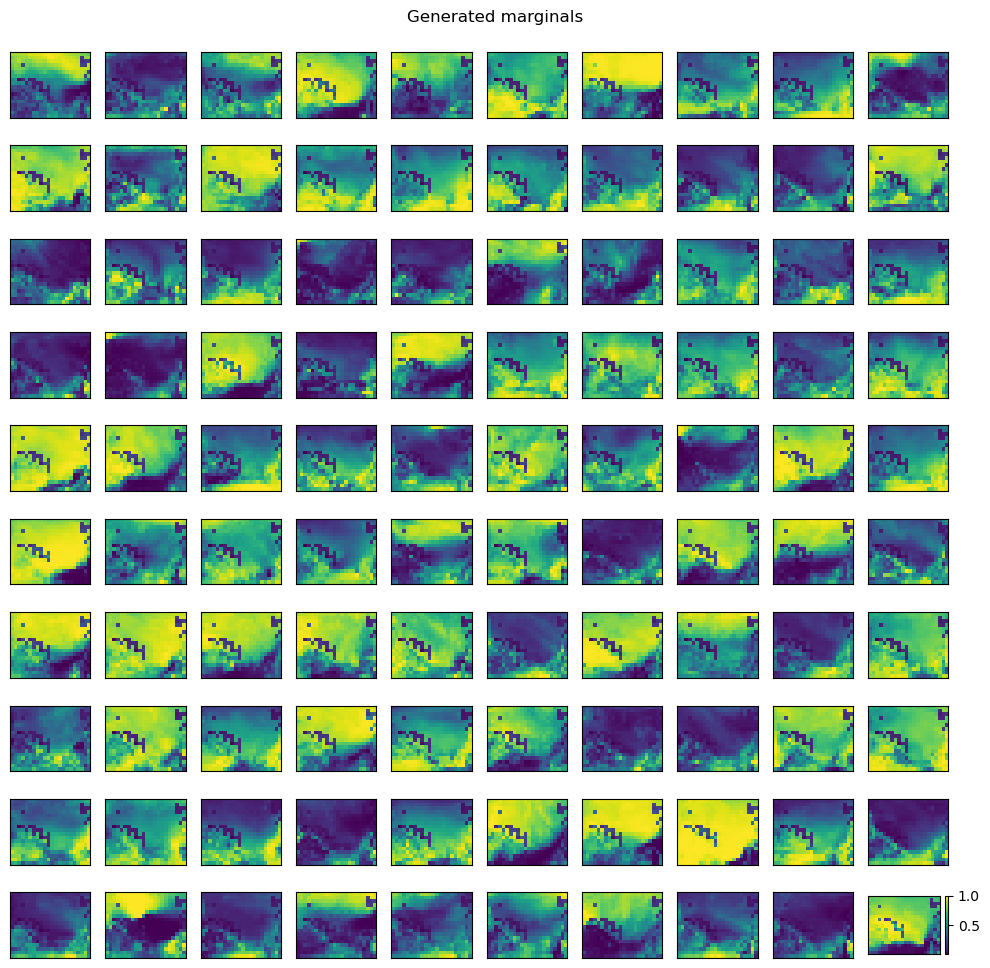

In [525]:
fig = viz_utils.plot_one_hundred_images(train_marginals)

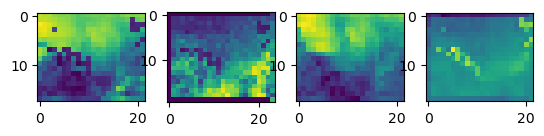

In [534]:
fig, ax = plt.subplots(1, 4)
i = 4

ax[0].imshow(train_marginals[i, ..., 0])
ax[1].imshow(fake_marginals[i, ..., 0])

ax[2].imshow(train_quantiles[i, ..., 0])
ax[3].imshow(fake_quantiles[i, ..., 0])

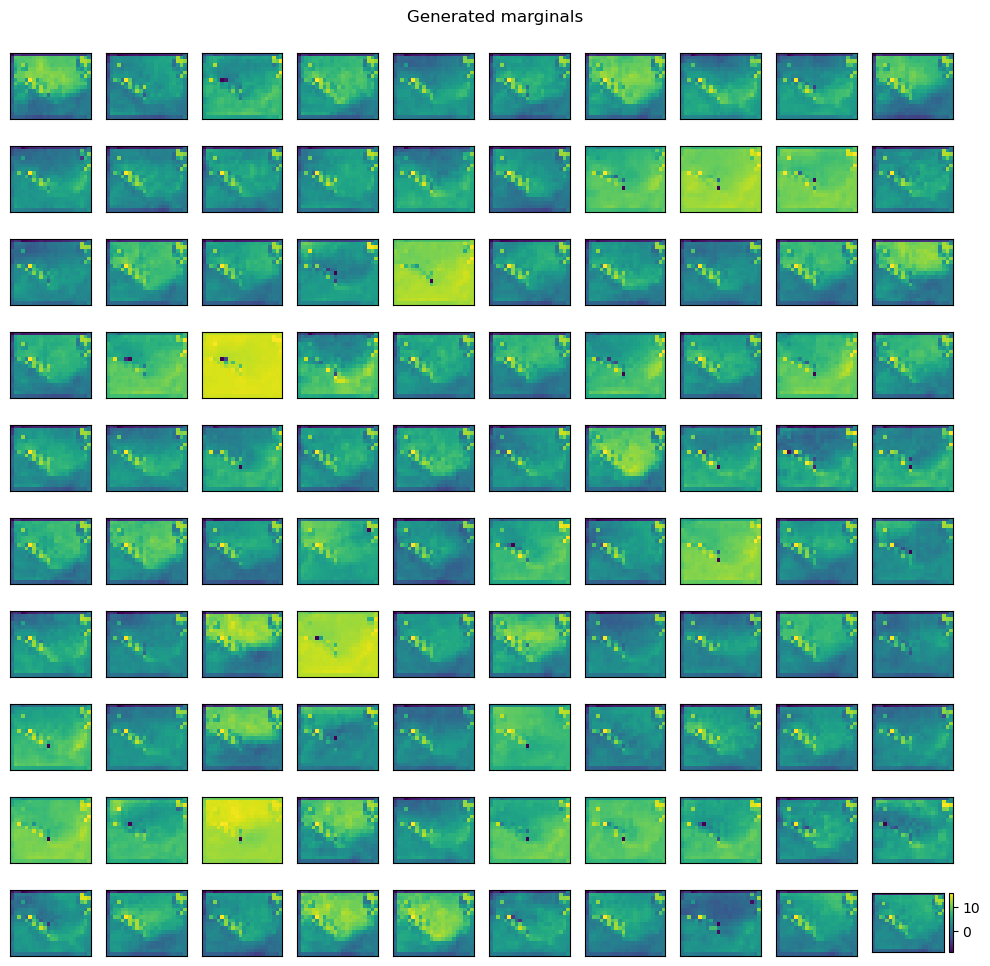

In [521]:
fig = viz_utils.plot_one_hundred_images(fake_quantiles)

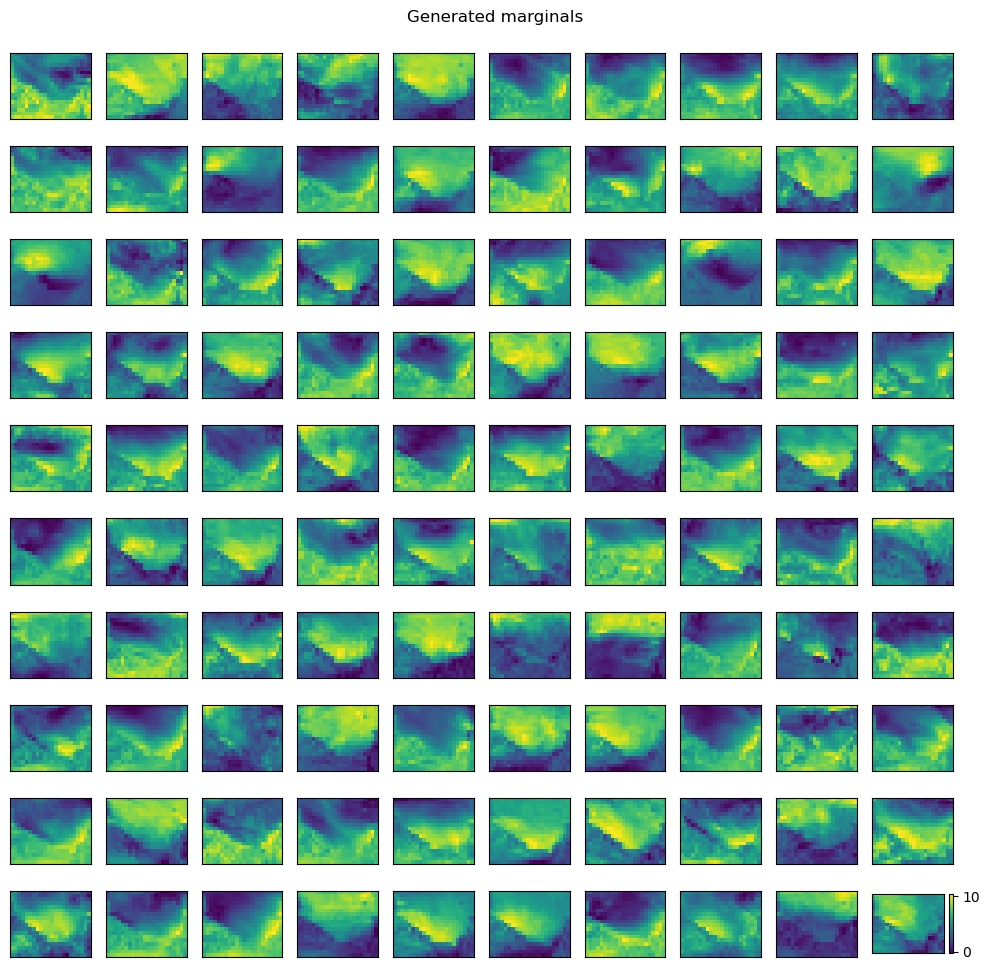

In [524]:
test_quantiles = tf_utils.marginals_to_winds(test_marginals, (params_u10, params_v10))
fig = viz_utils.plot_one_hundred_images(test_quantiles)